In [1]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

1st loop:   0%|          | 0/3 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

2nd loop:   0%|          | 0/100 [00:00<?, ?it/s]

In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [3]:
def sine_func(x, w, amp):
  return amp*np.sin(w*x)

interactive(children=(FloatSlider(value=1.0, description='w', max=4.0, step=0.25), FloatSlider(value=1.0, desc…

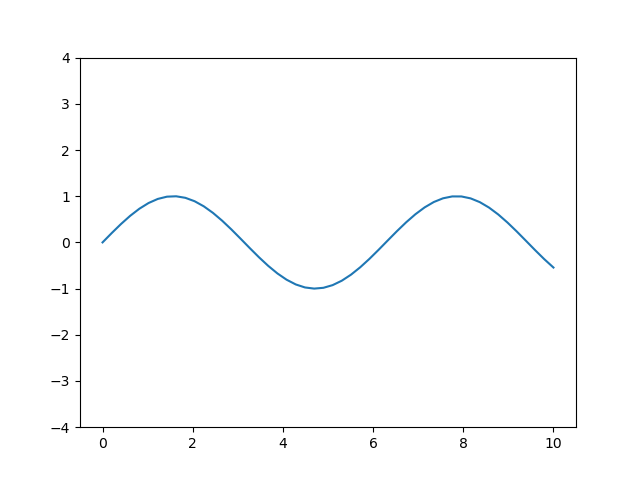

In [4]:
fig_one, ax_one = plt.subplots(1,1)

x = np.linspace(0,10)

@widgets.interact(w=(0, 4, 0.25), amp=(0, 4, .1))
def update(w = 1, amp = 1):
    plt.clf()
    plt.ylim(-4, 4)
    plt.plot(x, sine_func(x, w, amp))

In [ ]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

from ipywidgets import Output, FloatSlider, Layout
from IPython.display import clear_output
w_output = Output(layout=Layout(border="1px solid blue"))
w_debug = Output(layout=Layout(border="1px solid red"))

with w_debug:
    print("DEBUG!")

x = np.linspace(0,10, 100)
w = 1.3
amp = 1.0

w_w = FloatSlider(min=0.1, max=5.0, step=0.05, value=0.8, description="W")
w_a = FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0, description="Amplitude")


props = dict(
    linewidth=1
)


# plt.ioff()
fig_two, ax_two = plt.subplots(1,1)
# plt.ion()


with w_output:
    display(fig_two.canvas)
    
def on_pick(evt):
    with w_debug:
        print(evt)
        props["linewidth"] = props["linewidth"] + 1
        redraw_plot({})
    
cid = fig_two.canvas.mpl_connect('pick_event', on_pick)
    
def redraw_plot(evt):
    with w_output:
        ax_two.cla()
        ax_two.set_ylim(-4, 4)
        ax_two.plot(x, sine_func(x, w_w.value, w_a.value), **props, picker=True)
        clear_output(wait=True)
        display(fig_two.canvas)

redraw_plot({})

w_w.observe(redraw_plot, names=["value"])
w_a.observe(redraw_plot, names=["value"])

display(w_w)
display(w_a)
display(w_output)
display(w_debug)